### OpenCV
- Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python

In [1]:
!pwd

/content


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content

/content


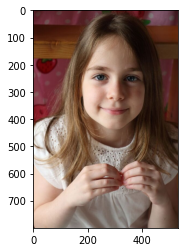

True

In [6]:
## 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2

filepath = '/content/drive/MyDrive/cakd8/강의/images/facedata/girl.png'
img = cv2.imread(filepath)
# plt.axis('off') # axis 출력 끄기
# OpenCV BGR(파녹빨) 인 반면 matplotlib RGB(빨녹파) 순서
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # 이미지 출력

plt.show()

# 이미지 저장하기
cv2.imwrite("/content/drive/MyDrive/cakd8/강의/images/facedata/girl1.png", img)

(800, 533, 3)


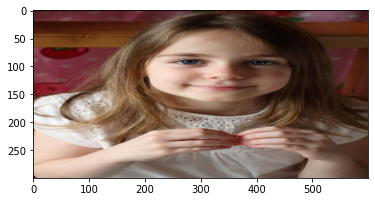

In [16]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
filepath = '/content/drive/MyDrive/cakd8/강의/images/facedata/girl1.png'
img = cv2.imread(filepath)
print(img.shape)
# plt.axis('off')
# 이미지 크기 변경하기
im2 = cv2.resize(img, (600, 300))  # img, (width, height)
# 크기 변경한 이미지 저장하기
cv2.imwrite("/content/drive/MyDrive/cakd8/강의/images/facedata/out-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

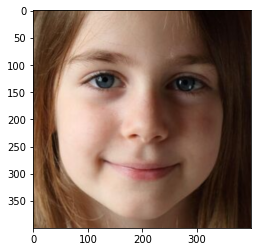

In [8]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
filepath = '/content/drive/MyDrive/cakd8/강의/images/facedata/girl1.png'
img = cv2.imread(filepath)
# plt.axis('off')
# 이미지 자르기
im3 = img[150:450, 150:450]  # y1:y2, x1:x2
# 이미지 크기 변경하기
im3 = cv2.resize(im3, (400, 400))
# 크기 변경한 이미지 저장하기
cv2.imwrite("/content/drive/MyDrive/cakd8/강의/images/facedata/cut-resize.png", im3)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
plt.show()

### 물체 검출

#### 얼굴 검출 - 자동으로 얼굴에 모자이크 처리
- 인간의 얼굴이 어디 있는지 검출
- 사람의 얼굴을 검출하고 자동으로 모자이크 처리\
사생활 보호를 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리\
얼굴 인식을 사용해 사람 얼굴이 있는 사진을 자동으로 수집

[얼굴 검출 캐스케이드-얼굴 요소 데이터베이스]https://github.com/opencv/opencv/tree/master/data/haarcascades

얼굴의 좌표 = 149 127 316 316


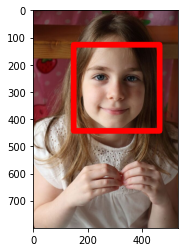

In [9]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기
# OpenCV는 Haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴 요소 DB)를 사용해 눈, 코, 잎과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# 얼굴 검출 전용 캐스케이드 파일 외 정면 얼굴, 웃는 얼굴, 눈, 몸 전체를 검출하는 다양한 캐스케이드 파일
cascade_file = "/content/drive/MyDrive/cakd8/강의/images/facedata/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스캐이드 파일을 지정해 다양한 물체 검출

# 이미지를 읽어 들이고 그레이스케일로 변환하기
# 밝은 부분은 흰색, 어두운 부분은 검은색. 코는 밝은 부분, 코의 양옆은 어두운 부분
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단. 각 요소의 명암패턴을 결합해 얼굴의 형태 확인
filepath = '/content/drive/MyDrive/cakd8/강의/images/facedata/girl.png'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기(cascade.detectMultiScale() 메서드를 사용)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150)) # 그레이스케일 이미지데이터, 얼굴 인식영역의 최소 크기 지정
# 결과 확인하기 
if len(face_list) == 0:          # 검출 결과를 확인 후 리스트가 비어 있으면 메시지 출력 후 종료
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기    # 검출한 얼굴 영역에 붉은색 테두리를 랜더링
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("/content/drive/MyDrive/cakd8/강의/images/facedata/face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



In [ ]:
# mosaic.py
import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)  # 보간법
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

In [17]:
# 모듈 업로드
!cp /content/drive/MyDrive/cakd8/강의/images/facedata/mosaic.py /content

In [18]:
!ls

drive  mosaic.py  sample_data


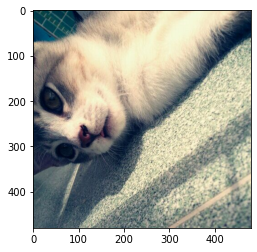

In [19]:
img = cv2.imread("/content/drive/MyDrive/cakd8/강의/images/facedata/cat.png")
# 이미지 출력하기
# cv2.imwrite("/content/drive/MyDrive/cakd8/강의/images/facedata/cat.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

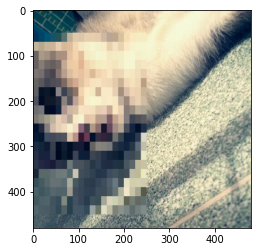

In [22]:
# import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어 들이고 모자이크 처리하기
# img = cv2.imread("drive/MyDrive/colab_lecture/data/facedata/cat.png")
img = cv2.imread("/content/drive/MyDrive/cakd8/강의/images/facedata/cat.png")
mos = mosaic(img, (0, 50, 250, 450), 20) 

# 이미지 출력하기
# cv2.imwrite("drive/MyDrive/colab_lecture/data/facedata/cat-mosaic.png", mos)
cv2.imwrite("/content/drive/MyDrive/cakd8/강의/images/facedata/cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

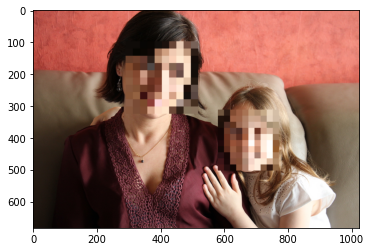

In [23]:
# 사람 얼굴에 자동으로 모자이크 처리하기
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기 
cascade_file = "/content/drive/MyDrive/cakd8/강의/images/facedata/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 
img = cv2.imread("/content/drive/MyDrive/cakd8/강의/images/facedata/family.jpg")
# img = cv2.imread("myphoto.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기 
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite("/content/drive/MyDrive/cakd8/강의/images/facedata/family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Q. 5명 이상 얼굴 사진이 들어있는 이미지를 다운로드 받아서 모자이크 처리를 하세요.

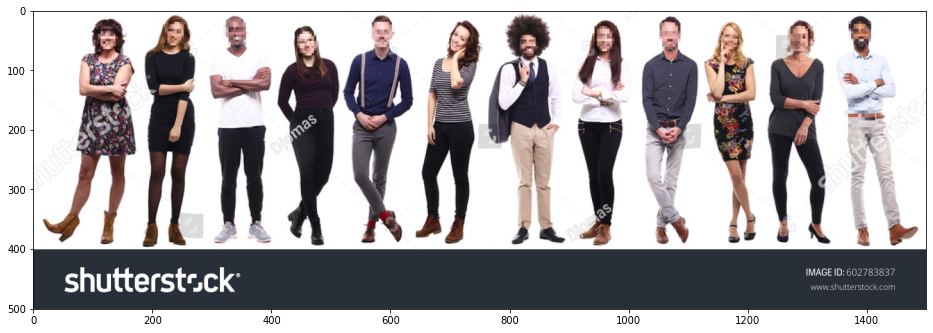

In [ ]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

cascade_file = "/content/drive/MyDrive/cakd8/강의/images/facedata/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("/content/drive/MyDrive/cakd8/강의/images/facedata/people.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(15,15))
if len(face_list) == 0: quit()

for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

cv2.imwrite("/content/drive/MyDrive/cakd8/강의/images/facedata/mpeople.png", img)
plt.figure(figsize=(16,9))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Q. 'girl.jpg' 사진을 읽어 와서 다음 사항을 수행하세요.
- 얼굴 검출하고 영역 표시하는 사용자 함수 만들기
- 여러 각도(0 ~ 80 도) 이미지 9개를 for문 과 subplot을 이용하여 만들고 모자이크 처리

---0---
얼굴의 좌표 = 319 308 405 405
---10---
얼굴의 좌표 = 394 385 409 409
---20---
얼굴의 좌표 = 451 444 408 408
---30---
얼굴의 좌표 = 494 483 409 409
---40---
---50---
---60---
---70---
---80---


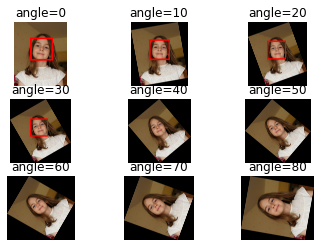

In [ ]:
# OpenCV의 얼굴 검출은 옆모습과 기울어진 얼굴을 잘 검출 못함
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 검출기 생성하고 이미지 읽어 들이기
cascade_file = "/content/drive/MyDrive/cakd8/강의/images/facedata/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("/content/drive/MyDrive/cakd8/강의/images/facedata/girl.jpg")

# 얼굴 검출하고 영역 표시하기
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    # 인식한 부분 표시하기
    for (x,y,w,h) in face_list:
        print("얼굴의 좌표 =", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)

# 여러 각도의 이미지를 만들고 테스트하기
for i in range(0, 9):
    ang = i * 10
    print("---" + str(ang) + "---")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.title("angle=" + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
        
plt.show()


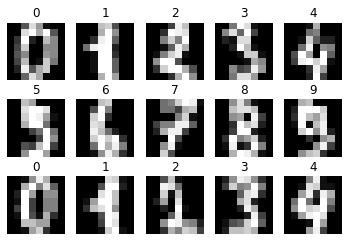

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.axis('off')
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i],cmap='gray')
plt.show()

In [ ]:
print(digits.DESCR)

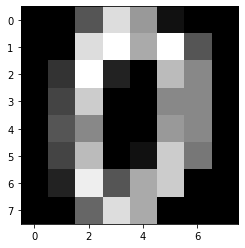

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()

print(d0)

In [ ]:
d = digits.images
d = d.reshape((-1, 64))
print(len(d[0]))
print(len(d))
print(d[0])

64
1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# 데이터 읽어 들이기 --- (*1)
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) # 2차원 배열을 1차원 배열로 변환하기 --- (*2)
# 데이터를 학습 전용과 테스트 전용으로 분리하기 --- (*3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# 데이터 학습하기 --- (*4)
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 예측하고 정답률 출력하기 --- (*5)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9377777777777778


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# 학습한 데이터 저장하기
import joblib
# from sklearn.externals import joblib
joblib.dump(clf, '/content/drive/MyDrive/cakd8/강의/images/digits.pkl')

['/content/drive/MyDrive/cakd8/강의/images/digits.pkl']

OpenCV를 활용한 영상 처리
- OpenCV의 VideoCapture 클래스
  - 동영상을 개별 Frame으로 하나씩 읽어들이는 기능 제공
  - 생성 인자로 입력 video 파일 위치를 받아 생성
    - cap=cv2.VideoCapture(video_input_path)
  - 입력 video 파일의 다양한 속성 가져오기 가능
    - 영상 Frame 너비
    - cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    - 영상 Frame 높이
    - cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    - 영상 FPS(Frame Per Second)
    - cap.get(cv2.CAP_PROP_FPS)
  - read()는 마지막 Frame까지 차례로 Frame을 읽음
- VideoWriter
  - VideoCapture로 읽어들인 개별 Frame을 동영상 파일로 Write 수행
  - write할 동영상 파일 위치, Encoding 코덱 유형, write fps 수치, frame 크기를 생성자로 입력 받음
  - 이들 값에 따른 동영상 write 수행
  - write 시, 특정 포맷으로 동영상 Encoding 가능
    - DIVX, XVID, MJPG, X264, WMV1, WMV2

In [ ]:
!mkdir ./data
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2022-12-28 08:11:19--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2022-12-28 08:11:19--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2022-12-28 08:11:19--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

In [ ]:
ls data/

Night_Day_Chase.mp4


In [ ]:
# VideoCaptuer 객체와 VideoWriter 객체를 생성하고 frame의 갯수, FPS, video Frame 크기의 정보를 읽어 출력
import cv2

video_input_path = '/content/data/Night_Day_Chase.mp4'
video_output_path = '/content/data/Night_Day_Chase_out.mp4'

cap = cv2.VideoCapture(video_input_path)

codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) #(200, 400)
vid_fps = cap.get(cv2.CAP_PROP_FPS)

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame 크기:', vid_size)

총 Frame 갯수: 1383 FPS: 28 Frame 크기: (1216, 516)


In [ ]:
import time

green_color=(0, 255, 0)
red_color=(0, 0, 255)

start = time.time()
index=0
# 프레임 하나씩 읽고 쓰기
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    print('frame :', index, '처리 완료')
    
    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    caption = "frame:{}".format(index)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)
    
    vid_writer.write(img_frame)

print('write 완료 시간:', round(time.time()-start,4))
vid_writer.release()
cap.release()


frame : 1 처리 완료
frame : 2 처리 완료
frame : 3 처리 완료
frame : 4 처리 완료
frame : 5 처리 완료
frame : 6 처리 완료
frame : 7 처리 완료
frame : 8 처리 완료
frame : 9 처리 완료
frame : 10 처리 완료
frame : 11 처리 완료
frame : 12 처리 완료
frame : 13 처리 완료
frame : 14 처리 완료
frame : 15 처리 완료
frame : 16 처리 완료
frame : 17 처리 완료
frame : 18 처리 완료
frame : 19 처리 완료
frame : 20 처리 완료
frame : 21 처리 완료
frame : 22 처리 완료
frame : 23 처리 완료
frame : 24 처리 완료
frame : 25 처리 완료
frame : 26 처리 완료
frame : 27 처리 완료
frame : 28 처리 완료
frame : 29 처리 완료
frame : 30 처리 완료
frame : 31 처리 완료
frame : 32 처리 완료
frame : 33 처리 완료
frame : 34 처리 완료
frame : 35 처리 완료
frame : 36 처리 완료
frame : 37 처리 완료
frame : 38 처리 완료
frame : 39 처리 완료
frame : 40 처리 완료
frame : 41 처리 완료
frame : 42 처리 완료
frame : 43 처리 완료
frame : 44 처리 완료
frame : 45 처리 완료
frame : 46 처리 완료
frame : 47 처리 완료
frame : 48 처리 완료
frame : 49 처리 완료
frame : 50 처리 완료
frame : 51 처리 완료
frame : 52 처리 완료
frame : 53 처리 완료
frame : 54 처리 완료
frame : 55 처리 완료
frame : 56 처리 완료
frame : 57 처리 완료
frame : 58 처리 완료
frame : 59 처리 완료
frame 